<a href="https://colab.research.google.com/github/Phamhoahoa/100-Days-Of-ML-Code/blob/master/Week5_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Bag of Words Meets Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/data)
======

## Data Set

The labeled data set consists of 50,000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. No individual movie has more than 30 reviews. The 25,000 review labeled training set does not include any of the same movies as the 25,000 review test set. In addition, there are another 50,000 IMDB reviews provided without any rating labels.

## File descriptions

labeledTrainData - The labeled training set. The file is tab-delimited and has a header row followed by 25,000 rows containing an id, sentiment, and text for each review.
## Data fields

* id - Unique ID of each review
* sentiment - Sentiment of the review; 1 for positive reviews and 0 for negative reviews
* review - Text of the review

## Objective
Objective of this dataset is base on **review** we predict **sentiment** (positive or negative) so X is **review** column and y is **sentiment** column

## 1. Load Dataset

Let's first of all have a look at the data. You can download the file `labeledTrainData.tsv` on the [Kaggle website of the competition](https://www.kaggle.com/c/word2vec-nlp-tutorial/data), or on our [Google Drive](https://drive.google.com/file/d/1a1Lyn7ihikk3klAX26fgO3YsGdWHWoK5/view?usp=sharing)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/My Drive/Coder")

In [4]:
# Import pandas, numpy
import pandas as pd
import numpy as np

In [5]:
# Read dataset with extra params sep='\t', encoding="latin-1"
data = pd.read_csv('./labeledTrainData.tsv',sep='\t', encoding="latin-1")
data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


## 2. Preprocessing

In [6]:
# stop words
import nltk 
from nltk.corpus import stopwords

In [33]:
# Removing special characters and "trash"
import re
def preprocessor(text):
    # Remove HTML markup
    text = str(text) # Your code here
    cleanr = re.compile('<.*?>')
    clean_text = re.sub(cleanr, '', text)
    # Save emoticons for later appending
    # Your code here
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            "]+", flags=re.UNICODE)
    clean_text = emoji_pattern.sub(r'', clean_text) # no emoji
    clean_text = re.sub('[^A-Za-z0-9]+', ' ', clean_text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    # Your code here
    clean_text = clean_text.lower()
    return clean_text
data['reviews'] = data['review'].apply(preprocessor)
data.head()

,id,sentiment,review,reviews
0,5814_8,1,With all this stuff going down at the moment w...,with all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",the classic war of the worlds by timothy hine...
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,the film starts with a manager nicholas bell g...
3,3630_4,0,It must be assumed that those who praised this...,it must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious 8...


In [34]:
                                                                                                                                                                                                                                                                                                                                                                                                                                # tokenizer and stemming
# tokenizer: to break down our twits in individual words
# stemming: reducing a word to its root
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
# Your code here
ps = PorterStemmer()
def tokenizer_porter(text):
    token_words = word_tokenize(text)
    words = [ps.stem(x) for x in token_words ]
    return words

In [35]:
# split the dataset in train and test
# Your code here
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(data['reviews'].to_list(), data['sentiment'].to_list(), test_size=0.2, random_state=42)
len(X_train)
len(y_train)


20000

## 3. Create Model and Train 

Using **Pipeline** to concat **tfidf** step and **LogisticRegression** step

In [36]:
# Import Pipeline, LogisticRegression, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline, FeatureUnion
from time import time
# Your code here
tfidf = TfidfVectorizer(analyzer='word',max_features=3000)
classifier = LogisticRegression(solver='sag')
     
clf = Pipeline([
    ('vect', tfidf),
    ('clf', classifier),
    ])
model = clf.fit(X_train, y_train)

## 4. Evaluate Model

recall-score:  0.8947995236204843
precision-score:  0.876020209871745
f1-score:  0.8853102906520031


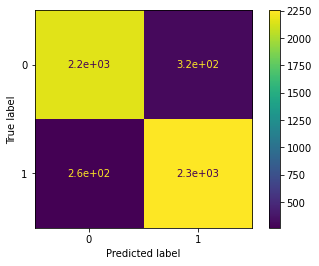

In [37]:
# Using Test dataset to evaluate model
from sklearn.metrics import f1_score,precision_score,recall_score
y_predict = model.predict(X_test)
print('recall-score: ',recall_score(y_test, y_predict))
print('precision-score: ',precision_score(y_test, y_predict))
print('f1-score: ',f1_score(y_test, y_predict))
# classification_report
# confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)  # doctest: +SKIP
plt.show() 

## 5. Export Model 

In [38]:
# Using pickle to export our trained model
import pickle
import os
pickle.dump(model, open('model_project_week5.pkl', 'wb'))